# Simple Linear Regression

* Equation for simple linear regression can be given by
    $$ \hat{y} = \theta_{0} + \theta_{1} x$$

* The cost function for simple linear regression is given by
    $$ J (\theta_{0}, \theta_{1}) = \frac{1}{2n} \Sigma_{ i = 1}^{n} ( y_i - \hat{y}_i)^2 $$

* The gradient descent for simple linear regression is given by:

  $$ \theta_0 = \theta_0 - \alpha  \nabla{\theta_0} \Rightarrow \nabla{\theta_0} = \frac{1}{n} \Sigma_{ i = 1 }^{n} (y_i - \hat{y}_i)$$

  $$ \theta_1 = \theta_1 - \alpha  \nabla{\theta_1} \Rightarrow \nabla{\theta_1} = \frac{1}{n} \Sigma_{ i = 1 }^{n} [(y_i - \hat{y}_i) \times x_i]$$

In [301]:
## Implementation of Simple Linear Regression with Gradient descent
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class SimpleLinearRegression:
    def __init__(self, iterations: int = 1000, learning_rate:float = 0.01):    ## Constructor method.
        self.learning_rate = learning_rate                                     ## Initialising the learning rate.
        self.iterations    = iterations                                        ## Initialising the number of interations.
        self.bias          = 0.0                                               ## Initialising the bias (y - intercept).
        self.weight        = 0.0                                               ## Initialising the weight (slope).
        self.X             = None                                              ## Initialising the feature array.
        self.y             = None                                              ## Initialising the target array.
        self.N             = 0                                                 ## Initialising the number of data element in the feature array
        self.costs         = list()                                            ## Initialising a list to store the training costs for each iteration

    def fit(self, X: any([list, np.ndarray]), y: any([list, np.ndarray])):     ## Method to train the model.
        self.X = np.array(X).flatten()                                         ## Converts the features to a numpy array and flattens it.
        self.y = np.array(y).flatten()                                         ## Converts the targets to a numpy array and flattens it.
        self.N = self.X.shape[0]                                               ## Set the number of data elements.
        
        if self.N == 0:
            raise ValueError("Input array X cannot be empty.")
        if self.X.shape != self.y.shape:
            raise ValueError("Input array X and target array y must have the same shape!!")

        print("Starting model training...")
        for i in range(self.iterations):                                       ## Performing gradient descent.
            self.update_weights()
            current_training_cost = self.compute_training_cost(self.y, self.predict(self.X)) 
            self.costs.append(current_training_cost)
        
        print("Training complete.")
        print(f"Final Bias   ( y - intercept ): {self.bias:.4f}")
        print(f"Final Weight ( slope )        : {self.weight:.4f}")
        print(f"Final Training cost           : {self.costs[-1]:.4f}")

    
    def compute_training_cost(self, actuals, predictions):                     ## Method to calculate the training cost.
        cost = np.sum(np.power((actuals - predictions), 2)) / (2 * self.N)
        return cost

    def plot_costs(self):                                                      ## Method to plot the progression of training costs against number of iterations
        sctr_plt = plt.figure(figsize=(6, 6))
        plt.style.use("fivethirtyeight")
        sns.lineplot(x=range(1, len(self.costs) + 1), y=self.costs)
        plt.title("Cost function progression")
        plt.xlabel("Number of iterations")
        plt.ylabel("Training cost")
        plt.show()

    def update_weights(self):
        y_pred       = self.predict(self.X)                                    ## Predicting the target variable using the current weight and bias.
        del_bias     = np.sum(y_pred - self.y) / self.N                        ## Calculating the gradient of bias.
        del_weight   = np.sum((y_pred - self.y) * self.X ) / self.N            ## Calculating the gradient of weight.
        self.bias   -= self.learning_rate * del_bias                           ## Updating the bias.
        self.weight -= self.learning_rate * del_weight                         ## Updating the weight
        
        
    def predict(self, x):
        return self.bias + self.weight * x                                     ## Predicting the target for the given independent variable using the weight and bias
        

Starting model training...
Training complete.
Final Bias   ( y - intercept ): 0.9623
Final Weight ( slope )        : 2.5057
Final Training cost           : 0.0001


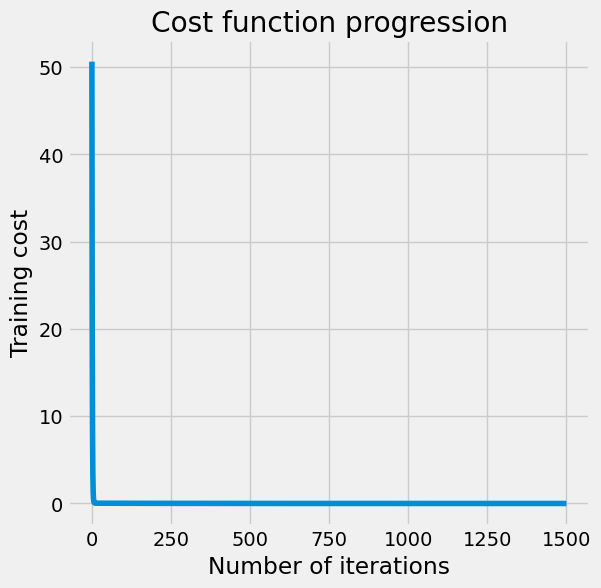

In [303]:
X = np.arange(1, 10, 0.25)
y = 1 + 2.5 * X

regressor = SimpleLinearRegression(1500)
regressor.fit(X, y)
regressor.plot_costs()

Starting model training...
Training complete.
Final Bias   ( y - intercept ): 1.2667
Final Weight ( slope )        : 0.9515
Final Training cost           : 0.1903

--- Training Complete ---
Learned Bias (Intercept): 1.2667
Learned Weight (Slope): 0.9515

Predictions for [ 0.   5.5 11. ]: [ 1.26666667  6.5        11.73333333]


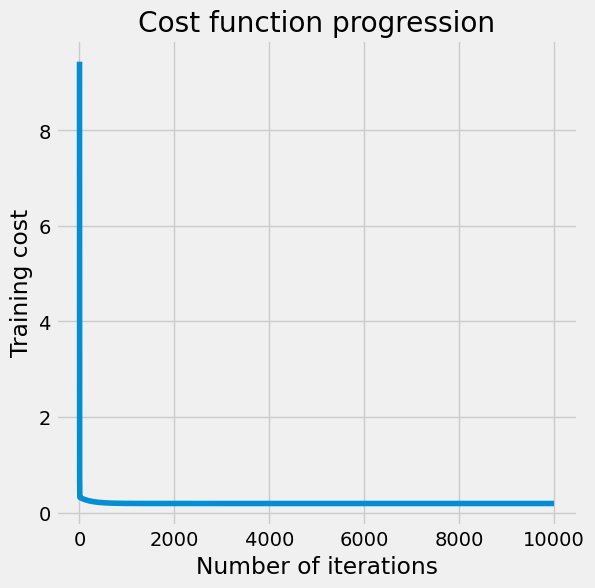


--- Scikit-learn Comparison ---
Scikit-learn Intercept: 1.2667
Scikit-learn Coeff: 0.9515
Scikit-learn Predictions for [ 0.   5.5 11. ]: [ 1.26666667  6.5        11.73333333]
Starting model training...
Training complete.
Final Bias   ( y - intercept ): 0.0089
Final Weight ( slope )        : 1.9998
Final Training cost           : 0.0000

--- New Dataset Training Complete ---
Learned Bias (Intercept): 0.0089
Learned Weight (Slope): 1.9998
Predictions for [25, 55]: [ 50.00281785 109.99556819]


In [305]:
# Example Usage:
if __name__ == "__main__":
    # Generate some synthetic data
    X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    y_train = np.array([2, 4, 5, 4, 5, 7, 8, 9, 10, 11]) # y = 1*X + 1 + noise

    # Create and train the model
    model = SimpleLinearRegression(iterations=10000, learning_rate=0.01)
    model.fit(X_train, y_train)
    
    print("\n--- Training Complete ---")
    print(f"Learned Bias (Intercept): {model.bias:.4f}")
    print(f"Learned Weight (Slope): {model.weight:.4f}")

    # Make predictions
    X_test = np.array([0, 5.5, 11])
    predictions = model.predict(X_test)
    print(f"\nPredictions for {X_test}: {predictions}")
    model.plot_costs()
    # For comparison with scikit-learn
    from sklearn.linear_model import LinearRegression
    skl_model = LinearRegression()
    skl_model.fit(X_train.reshape(-1, 1), y_train)
    print("\n--- Scikit-learn Comparison ---")
    print(f"Scikit-learn Intercept: {skl_model.intercept_:.4f}")
    print(f"Scikit-learn Coeff: {skl_model.coef_[0]:.4f}")
    print(f"Scikit-learn Predictions for {X_test}: {skl_model.predict(X_test.reshape(-1, 1))}")

    # Another example with different data
    X_new = np.array([10, 20, 30, 40, 50])
    y_new = np.array([20, 40, 60, 80, 100]) # y = 2 * X

    model2 = SimpleLinearRegression(iterations=10000, learning_rate=0.001)
    model2.fit(X_new, y_new)
    print("\n--- New Dataset Training Complete ---")
    print(f"Learned Bias (Intercept): {model2.bias:.4f}")
    print(f"Learned Weight (Slope): {model2.weight:.4f}")
    print(f"Predictions for [25, 55]: {model2.predict(np.array([25, 55]))}")